# Klausur

### A1 Auswahl Datensatz

**Datensatz 2: Vorhersage eines Erkrankungsverlaufs** Menschen mit einer kardiovaskulären Erkrankung oder einem hohen kardiovaskulären Risiko benötigen eine frühzeitige Erkennung und Behandlung, bei der ein maschinelles Lernmodell eine große Hilfe sein kann. Mit welcher Genauigkeit lässt sich aus charakteristischen Patientendaten der tödliche Ausgang einer kardiovaskulären Erkrankung vorhersagen? Welche Merkmale sind die stärksten Einflussfaktoren?

### A2 Skript- und Datenvorbereitung

In [51]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [52]:
df = pd.read_csv('heart_failure_clinical_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [53]:
print("Die Daten enthalten {} Zeilen und {} Spalten".format(df.shape[0], df.shape[1]))

Die Daten enthalten 299 Zeilen und 13 Spalten


In [54]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Metadaten-Informationen
- https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
- medizinische Informationen von 299 Patienten mit Herzversagen vom Faisalabad Insitute of Cardiology und dem allierten Krankenhaus in Faisalabad (Punjab, Pakistan) im Zeitraum von April bis Dezember 2015
- 105 Frauen und 194 Männer, zwischen 40 und 95
- alle Patienten hatten eine linke ventrikuläre systolische Dysfunktion und vorheriges Herzversagen (-> sind alle in Klasse III oder IV der New York Heart Association Klassifizierung für die Phasen des Herzversagens)
- https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

In [55]:
print("Duplikate: ")
df.duplicated().sum()

Duplikate: 


np.int64(0)

In [56]:
print("Fehlende Daten:")
df[df.columns].isnull().sum()

Fehlende Daten:


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##### Bereinigung des Datensatzes

- kp

##### abhängige Zielvariable = DEATH_EVENT
Ist die Person verstorben oder hat sie überlebt?

### A3 EDA

In [57]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [58]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [59]:
dfs = df
dfs[dfs.columns] = scaler.fit_transform(df[df.columns])
dfs.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


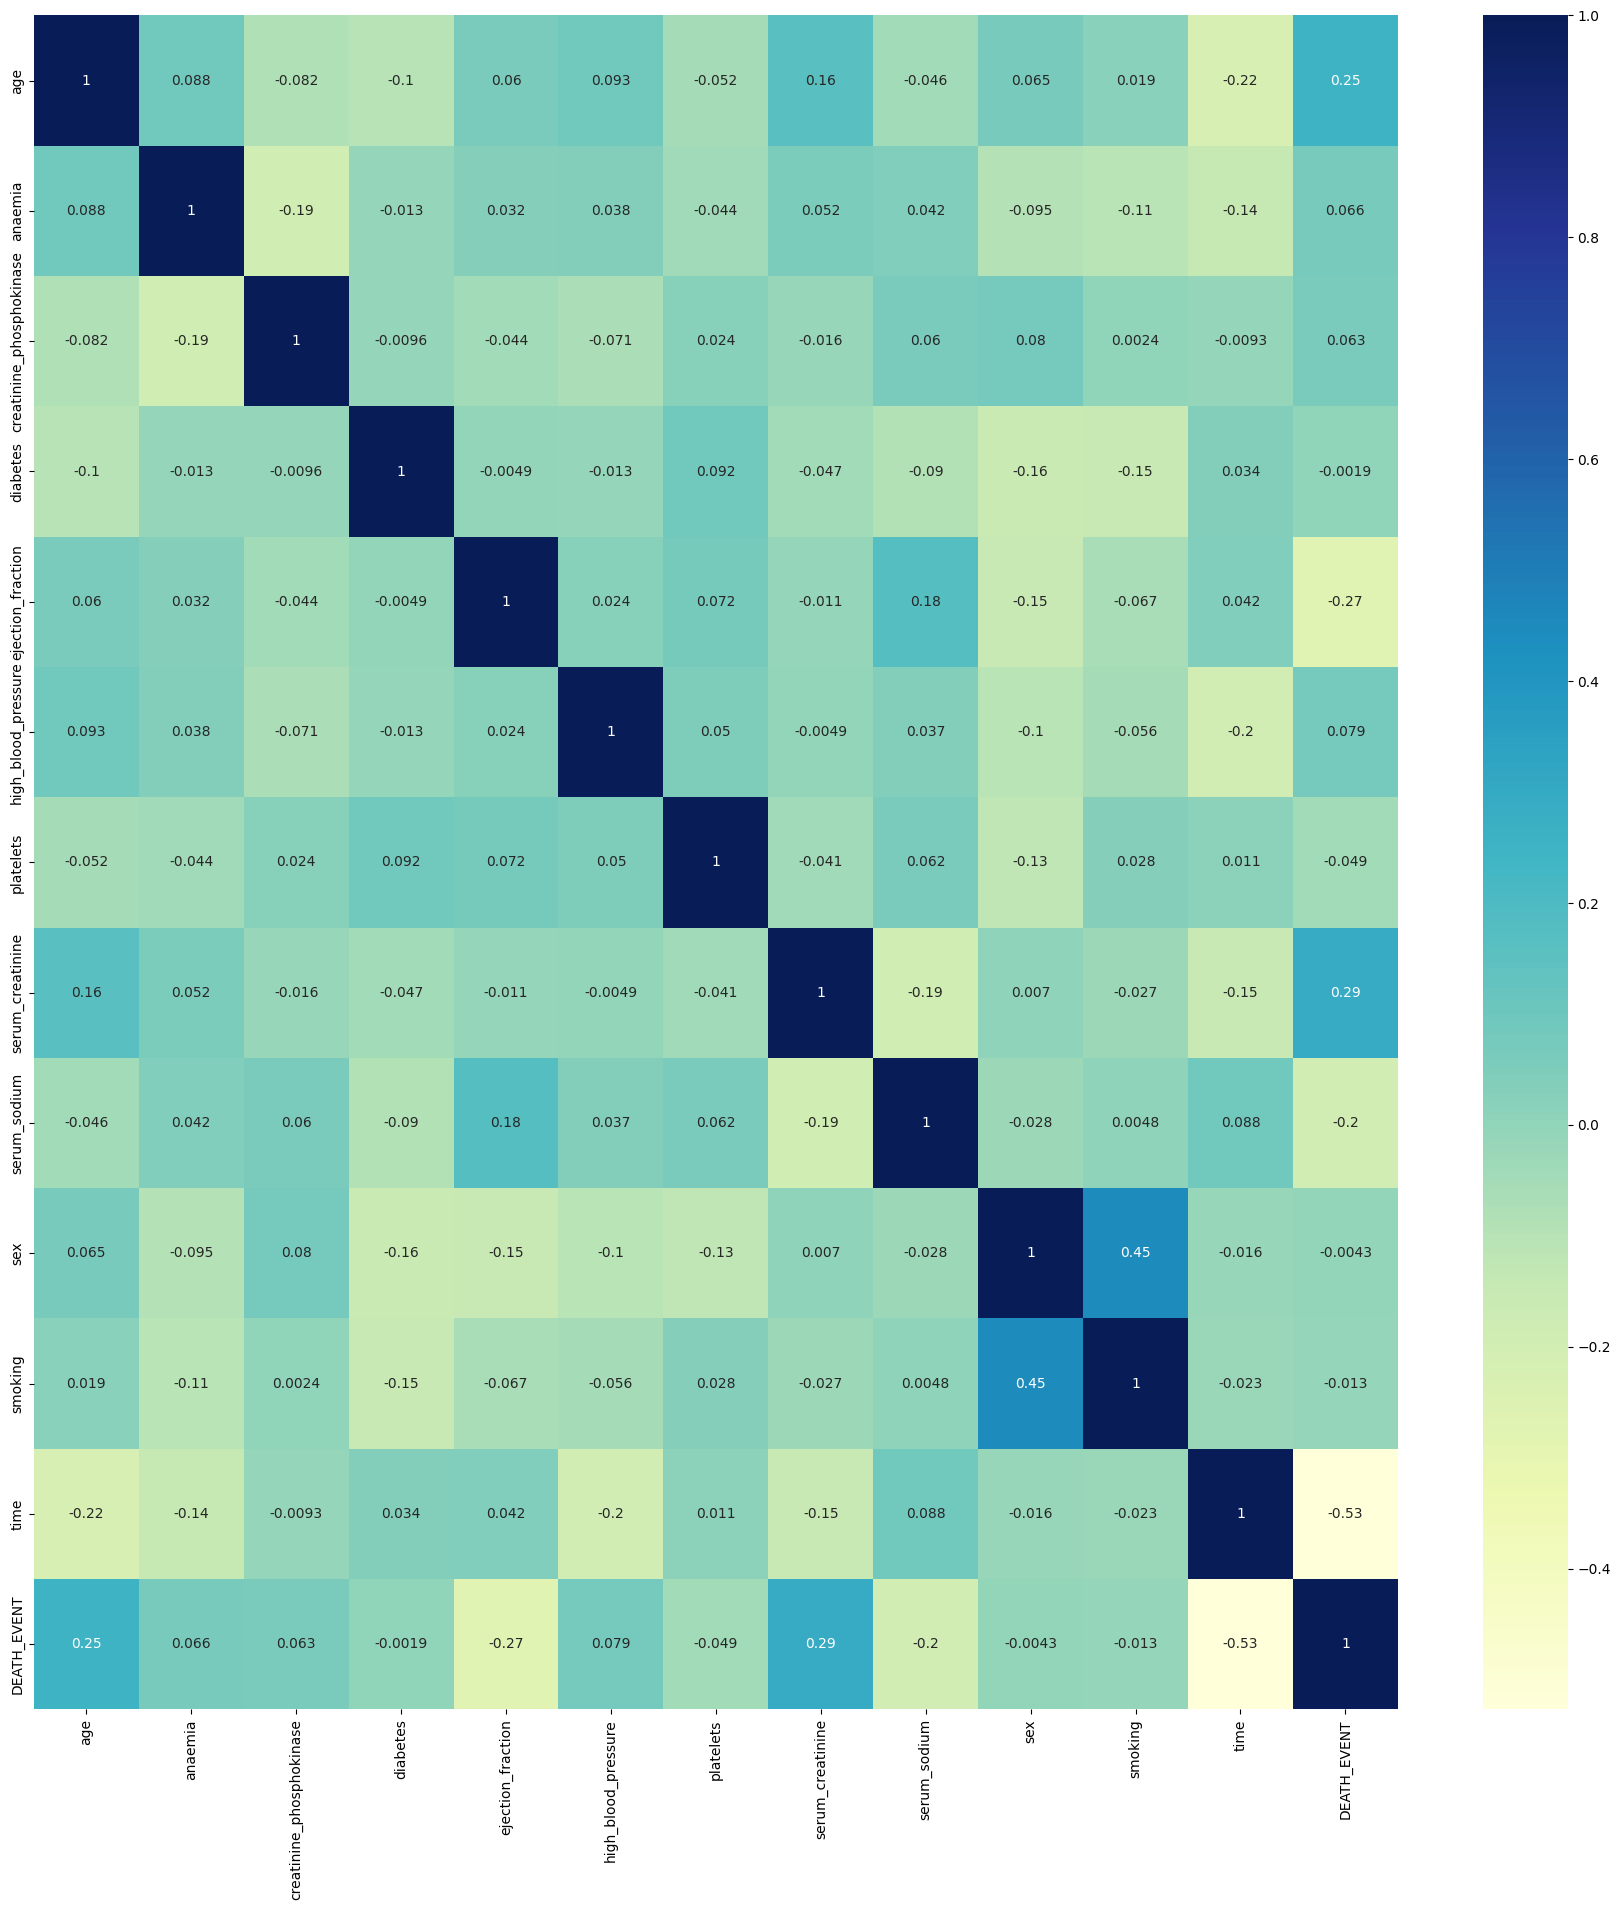

In [60]:
plt.figure(figsize = (22, 22))
sns.heatmap(dfs.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [61]:
df.drop(columns=["time"])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.0


### ANN

In [62]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Input
import seaborn as sns


### Versuch 1 (orientierung mehr an Internet, ChatGPT)

In [63]:

# Features und Zielvariable definieren
X = df.drop(columns=["DEATH_EVENT"]).values
y = df["DEATH_EVENT"].values

# Daten in Trainings- und Testset aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Daten normalisieren
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN-Modell definieren
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Sigmoid für binäre Klassifikation
])

# Modell kompilieren
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Modell trainieren
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Modellbewertung auf Testdaten
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
test_acc

d:\GitHub\DASC-2025\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0.7333333492279053

### Versuch 2 (orientierung mehr an Frau Schütze)

In [64]:

# Features und Zielvariable definieren
from matplotlib.cbook import flatten


X = df.drop(columns=["DEATH_EVENT"]).values
y = df["DEATH_EVENT"].values

# Daten in Trainings- und Testset aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Daten normalisieren
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN-Modell definieren

model = keras.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation ='relu'))
model.add(Dense(6, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Modell kompilieren
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [65]:
# Modell trainieren
model1 = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=True)

Epoch 1/50


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3264 - loss: 0.8853 - val_accuracy: 0.2500 - val_loss: 0.8186
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3146 - loss: 0.8410 - val_accuracy: 0.2708 - val_loss: 0.7860
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2819 - loss: 0.8455 - val_accuracy: 0.2917 - val_loss: 0.7596
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3492 - loss: 0.7899 - val_accuracy: 0.3542 - val_loss: 0.7406
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3183 - loss: 0.7912 - val_accuracy: 0.4167 - val_loss: 0.7245
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3715 - loss: 0.7536 - val_accuracy: 0.4375 - val_loss: 0.7124
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3748 - loss: 0.7321 - val_accuracy: 0.4792 - val_loss: 0.7011
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4195 - loss: 0.7274 - val_accuracy: 0.5625 - val_loss: 0.6917
Epoch 9/50


In [66]:
model1.history

{'accuracy': [0.30890053510665894,
  0.3141361176967621,
  0.32460734248161316,
  0.3560209572315216,
  0.35078534483909607,
  0.3821989595890045,
  0.38743454217910767,
  0.4450261890888214,
  0.4712041914463043,
  0.5130890011787415,
  0.5445026159286499,
  0.5811518430709839,
  0.6020942330360413,
  0.6596858501434326,
  0.717277467250824,
  0.7434554696083069,
  0.7696335315704346,
  0.7905759215354919,
  0.8062826991081238,
  0.8115183115005493,
  0.8272251486778259,
  0.8324607610702515,
  0.8324607610702515,
  0.8272251486778259,
  0.8429319262504578,
  0.8481675386428833,
  0.8429319262504578,
  0.8376963138580322,
  0.8638743162155151,
  0.8586387634277344,
  0.8638743162155151,
  0.8691099286079407,
  0.8691099286079407,
  0.8795811533927917,
  0.8795811533927917,
  0.8848167657852173,
  0.8848167657852173,
  0.8900523781776428,
  0.8952879309654236,
  0.8952879309654236,
  0.9005235433578491,
  0.9005235433578491,
  0.9005235433578491,
  0.9057591557502747,
  0.9057591557502

In [67]:
eval_loss, eval_accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.73


In [68]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,093 (8.18 KB)

 Trainable params: 697 (2.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,396 (5.46 KB)

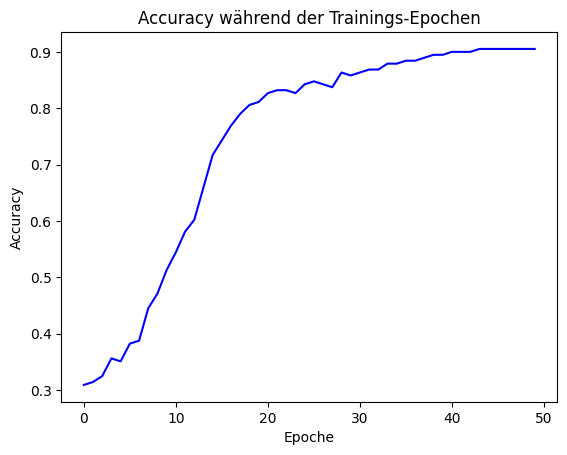

In [69]:
# Plot der Fehlerabnahme
plt.plot(model1.history['accuracy'], color='b')
plt.title("Accuracy während der Trainings-Epochen")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
#plt.legend()
plt.show()

In [70]:
losses = pd.DataFrame(model.history.history)

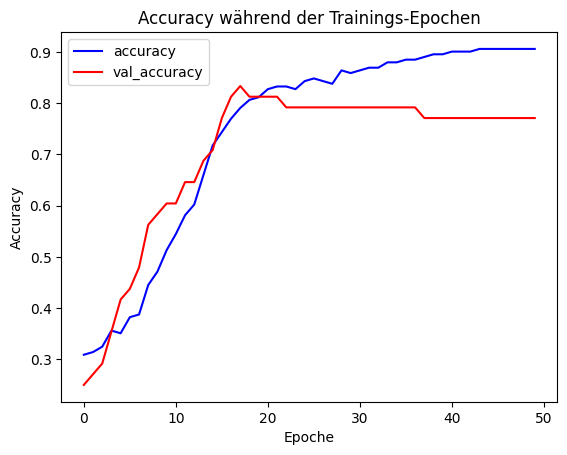

In [71]:
plt.plot(losses['accuracy'], color='b',  label='accuracy')
plt.plot(losses['val_accuracy'], color='r', label='val_accuracy')
plt.title("Accuracy während der Trainings-Epochen")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.legend()
plt.show()